# Text mining
In the text mining lectures, we have discussed how to preprocess textual data and create a model. We have also demonstrated how a model can be utilized with different data science techniques.

Now, we are putting the acquired knowledge into practice using Python. 
The main task is to implement required text preprocessing steps and solve problems using techniques demonstrated in the lecture.

The main packages for the text mining are `scikit-learn` (https://scikit-learn.org/stable/) and `nltk` (https://www.nltk.org/). `Scikit-learn` is a popular machine learning library featuring algorithms that also provide a range of useful utilities for text mining. `Nltk` is intended to support your text mining research and contains essential features for natural language processing. 


## Let's start with basic text preprocessing steps

In [5]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\testuser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize
text="""Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation. 
Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence. """
tokenized_sent=sent_tokenize(text)
print(tokenized_sent)

['Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.', 'Natural language processing has its roots in the 1950s.', 'Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.']


In [7]:
# Word Tokenization
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', 'Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', ',', 'natural', 'language', 'understanding', ',', 'and', 'natural-language', 'generation', '.', 'Natural', 'language', 'processing', 'has', 'its', 'roots', 'in', 'the', '1950s', '.', 'Already', 'in', '1950', ',', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', '``', 'Computing', 'Machinery', 'and', 'Intelligence', "''", 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', ',', 'a', 'tas

In the list, we can find redundancies, such as punctuation.

We have an option to tokenize words and remove punctuation at the same time.

In [8]:
# Tokenize and remove puntuation
from nltk.tokenize import RegexpTokenizer
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenized_words_no_puntuation = tokenizer.tokenize(text)
print(tokenized_words_no_puntuation)

['Natural', 'language', 'processing', 'NLP', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', 'Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural', 'language', 'understanding', 'and', 'natural', 'language', 'generation', 'Natural', 'language', 'processing', 'has', 'its', 'roots', 'in', 'the', '1950s', 'Already', 'in', '1950', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', 'Computing', 'Machinery', 'and', 'Intelligence', 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', 'a', 'task', 'that', 'involves', 'the', 'automated', 'interpretation', 'and', 

Let's now examine the text and find out the most frequently used words.

In [9]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words_no_puntuation)
print(fdist)

<FreqDist with 75 samples and 116 outcomes>


In [10]:
# top 10 most common words with their frequencies
fdist.most_common(10)

[('language', 8),
 ('and', 6),
 ('the', 5),
 ('natural', 5),
 ('a', 4),
 ('of', 4),
 ('in', 4),
 ('processing', 3),
 ('intelligence', 3),
 ('Natural', 2)]

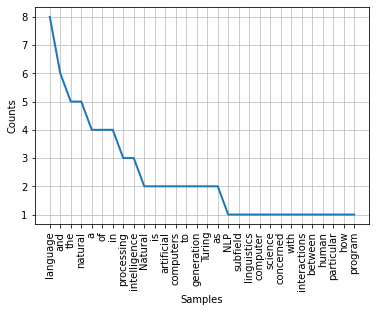

In [11]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In this plot and the output before, we observe that a few words are capitalized ("Turning", "NLP") and there are words with a low research value - stop words, such as "and", "the", "a" and "of".
That is why it is important to clean the data - to low case the text and remove punctuation and stop words during the processing.

In [12]:
# Lowercase
lower_text = text.lower()
print (lower_text)

natural language processing (nlp) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation. 
natural language processing has its roots in the 1950s. already in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence. 


In [13]:
# Stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'of', 'more', 'ain', 'on', 'each', 'had', 'when', 'where', 'just', 'she', 'is', 'doesn', 'to', 'ma', "wasn't", 'too', 'we', 'her', 'not', 's', 've', 'other', "hadn't", "that'll", "aren't", 'have', 'between', 'nor', 'until', 'wasn', 'he', 'him', 'aren', "won't", 'that', 'me', 'further', 'your', 'will', "wouldn't", 'didn', 'are', 'don', "couldn't", "should've", 'by', 'm', 'any', "mightn't", 'shouldn', 'with', "weren't", 'most', 'being', 'ours', 'i', 'if', 'you', 'll', 'hers', 'wouldn', 'for', "shouldn't", 'what', 'yourselves', 'does', 'against', 'then', 'these', 'in', 'under', 'who', 'at', 'herself', 'above', 'off', 'why', 'whom', 'can', 'very', 'myself', 'but', "you'll", 'has', "mustn't", 'there', 'itself', 'needn', 'do', 'our', 't', 'now', "shan't", 'no', 'because', "it's", 'doing', 're', 'themselves', 'yourself', 'up', 'them', 'through', 'from', "didn't", 'few', "don't", 'how', 'after', 'as', 'than', 'its', "you'd", 'about', 'their', 'isn', "you're", 'during', 'over', 'd', 'haven', '

### Task 1
Now it is your turn.
Please preprocess the following piece of text.

"""
Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big data.
Data science is a "concept to unify statistics, data analysis and their related methods" in order to "understand and analyze actual phenomena" with data.
Natural language processing is an important part of data science.
"""

First, you need to low case it. Then remove punctuation and tokenize (can be done as one step). 

Print the preprocessed sentences (lowcase, no punctuation, no stop words)and build a words frequency graph with the top 10 most frequent words.

In [14]:
# Please give your answer here
text_new="""Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big data.
Data science is a "concept to unify statistics, data analysis and their related methods" in order to "understand and analyze actual phenomena" with data.
Natural language processing is an important part of data science."""
lower_text = text_new.lower()
tokenized_word=tokenizer.tokenize(lower_text)
filtered_words=[]
for w in tokenized_word:
    if w.lower() not in stop_words:
        filtered_words.append(w)
print("Tokenized text:",tokenized_word)
print("Filterd text with no stop words:",filtered_words)

Tokenized text: ['data', 'science', 'is', 'an', 'inter', 'disciplinary', 'field', 'that', 'uses', 'scientific', 'methods', 'processes', 'algorithms', 'and', 'systems', 'to', 'extract', 'knowledge', 'and', 'insights', 'from', 'many', 'structural', 'and', 'unstructured', 'data', 'data', 'science', 'is', 'related', 'to', 'data', 'mining', 'machine', 'learning', 'and', 'big', 'data', 'data', 'science', 'is', 'a', 'concept', 'to', 'unify', 'statistics', 'data', 'analysis', 'and', 'their', 'related', 'methods', 'in', 'order', 'to', 'understand', 'and', 'analyze', 'actual', 'phenomena', 'with', 'data', 'natural', 'language', 'processing', 'is', 'an', 'important', 'part', 'of', 'data', 'science']
Filterd text with no stop words: ['data', 'science', 'inter', 'disciplinary', 'field', 'uses', 'scientific', 'methods', 'processes', 'algorithms', 'systems', 'extract', 'knowledge', 'insights', 'many', 'structural', 'unstructured', 'data', 'data', 'science', 'related', 'data', 'mining', 'machine', 'le

In [15]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_words)
print(fdist)

<FreqDist with 36 samples and 49 outcomes>


In [16]:
fdist.most_common(10)

[('data', 9),
 ('science', 4),
 ('methods', 2),
 ('related', 2),
 ('inter', 1),
 ('disciplinary', 1),
 ('field', 1),
 ('uses', 1),
 ('scientific', 1),
 ('processes', 1)]

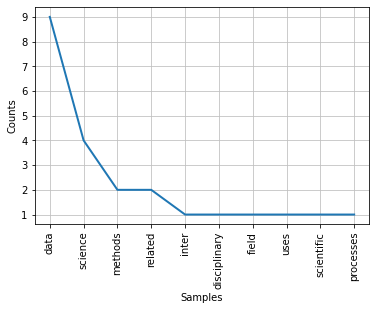

In [17]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(10,cumulative=False)
plt.show()

### Lexicon normalization: stemming and lemmatization


In [18]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

#print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['data', 'scienc', 'inter', 'disciplinari', 'field', 'use', 'scientif', 'method', 'process', 'algorithm', 'system', 'extract', 'knowledg', 'insight', 'mani', 'structur', 'unstructur', 'data', 'data', 'scienc', 'relat', 'data', 'mine', 'machin', 'learn', 'big', 'data', 'data', 'scienc', 'concept', 'unifi', 'statist', 'data', 'analysi', 'relat', 'method', 'order', 'understand', 'analyz', 'actual', 'phenomena', 'data', 'natur', 'languag', 'process', 'import', 'part', 'data', 'scienc']


In [19]:
#Difference betweeb stemming and lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "studying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: study
Stemmed Word: studi


### Stemming
Stemming implies removing suffixes and obtaining word roots. 
There are different kinds of stemmers, such as SnowballStemmer and PorterStemmer https://www.nltk.org/howto/stem.html

In [20]:
# Stemming

# import nltk
# nltk.download('stopwords')

from nltk.stem.snowball import SnowballStemmer, PorterStemmer
 
snowball_stemmer = SnowballStemmer('english', ignore_stopwords=True)

example = 'Process mining is a family of techniques in the field of process management that support the analysis of business processes based on event logs. During process mining, specialized data mining algorithms are applied to event log data in order to identify trends, patterns and details contained in event logs recorded by an information system. Process mining aims to improve process efficiency and understanding of processes.'
wordlist = example.split(' ')
print(example)
print()
print(' '.join([snowball_stemmer.stem(word) for word in wordlist]))

Process mining is a family of techniques in the field of process management that support the analysis of business processes based on event logs. During process mining, specialized data mining algorithms are applied to event log data in order to identify trends, patterns and details contained in event logs recorded by an information system. Process mining aims to improve process efficiency and understanding of processes.

process mine is a famili of techniqu in the field of process manag that support the analysi of busi process base on event logs. during process mining, special data mine algorithm are appli to event log data in order to identifi trends, pattern and detail contain in event log record by an inform system. process mine aim to improv process effici and understand of processes.


As you can see, the stemming procedure does not always imply just cutting a part of a word. Modern stemmers also modify the root of the word. This nevertheless cannot be considered as lemmatization, because converging to lemmas is not the goal of stemming.


### Lemmatization

Lemmatization transforms a token to its base form, a lemma. In nltk, you can use the WordNet lemmatizer. Let's see the results of lemmatization comparing to stemming.


In [21]:
# Lemmatization

# import nltk
# nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

example = 'Process mining is a family of techniques in the field of process management that support the analysis of business processes based on event logs. During process mining, specialized data mining algorithms are applied to event log data in order to identify trends, patterns and details contained in event logs recorded by an information system. Process mining aims to improve process efficiency and understanding of processes.'
wordlist = example.split(' ')
print(example)
print()
print(' '.join([snowball_stemmer.stem(word) for word in wordlist]))
print()
print(' '.join([lemmatizer.lemmatize(word) for word in wordlist]))

Process mining is a family of techniques in the field of process management that support the analysis of business processes based on event logs. During process mining, specialized data mining algorithms are applied to event log data in order to identify trends, patterns and details contained in event logs recorded by an information system. Process mining aims to improve process efficiency and understanding of processes.

process mine is a famili of techniqu in the field of process manag that support the analysi of busi process base on event logs. during process mining, special data mine algorithm are appli to event log data in order to identifi trends, pattern and detail contain in event log record by an inform system. process mine aim to improv process effici and understand of processes.

Process mining is a family of technique in the field of process management that support the analysis of business process based on event logs. During process mining, specialized data mining algorithm 

It can be seen that lemmatization is more complicated comparing to stemming. Lemmatizers tend to be more conservative than stemmers.

It is useful that the WordNet stemmer applies a built-in morphy function. It passes a part-of-speech tag as a parameter, and depending on it, a lemma is identified. The default behaviour of the WordNet lemmatizer is to consider everything a NOUN. Let's see how the result changes passing a VERB tag.


In [22]:
print(lemmatizer.lemmatize('loving'))
print(lemmatizer.lemmatize('loving', 'v'))

loving
love


### Part-of-Speech (POS) tagging
The POS tagging looks for relationships within a sentence and assigns a corresponding tag to each word.

You can read more about POS tagging here https://www.nltk.org/book/ch05.html

And the POS tag list can be found here https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/

In [23]:
sentence = "Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data."


In [24]:
tokens=nltk.word_tokenize(sentence)
print(tokens)

['Data', 'science', 'is', 'an', 'inter-disciplinary', 'field', 'that', 'uses', 'scientific', 'methods', ',', 'processes', ',', 'algorithms', 'and', 'systems', 'to', 'extract', 'knowledge', 'and', 'insights', 'from', 'many', 'structural', 'and', 'unstructured', 'data', '.']


In [25]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\testuser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('Data', 'NNP'),
 ('science', 'NN'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('inter-disciplinary', 'JJ'),
 ('field', 'NN'),
 ('that', 'WDT'),
 ('uses', 'VBZ'),
 ('scientific', 'JJ'),
 ('methods', 'NNS'),
 (',', ','),
 ('processes', 'NNS'),
 (',', ','),
 ('algorithms', 'NN'),
 ('and', 'CC'),
 ('systems', 'NNS'),
 ('to', 'TO'),
 ('extract', 'VB'),
 ('knowledge', 'NN'),
 ('and', 'CC'),
 ('insights', 'NNS'),
 ('from', 'IN'),
 ('many', 'JJ'),
 ('structural', 'JJ'),
 ('and', 'CC'),
 ('unstructured', 'JJ'),
 ('data', 'NNS'),
 ('.', '.')]

## Classification task

Text classification is a very popular task in text mining.


#### Loading the data

The first step is to obtain the data for analysis. 
Here, we are using again the dataset `20 newsgroups` that is organized into 20 different newsgroups, each corresponding to a different topic. 

In [26]:
# Loading the training set part of 20newsgroups
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

Then we can see the topics that would be the target attribute, which is required for supervised machine learning.

In [27]:
# Visualize the categories(target attribute)
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [28]:
# Fragment of a document
print("\n".join(twenty_train.data[0].split("\n")[:7]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw


### Feature extraction
In order to perform machine learning on text documents, we first need to turn a text content into numerical feature vectors.


### Tokenization and the bag-of-words (BoW) model
The `CountVectorizer` method can be used to directly transform the dataset to the BoW model. This will first tokenize the text into words, and then create a vector space with one dimension for every word in the dictionary. Finally, it translates the documents into count vectors.

In [29]:
# Tokenization and construction of the bag-of-words model

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

We can then build our first classifier using the count vector space. To do so, we are using the `pipeline` function of `scikit-learn`: we specify a sequence of operations to be performed on the data. In this case, we apply the `CountVectorizer` and then the SVM classifier with linear kernel and stochastic gradient descent as solver for the optimization problem.

In [30]:
# Text Mining pipeline v1: tokenization, BoW model, classification with SVM (linear kernel)

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import numpy as np

text_clf = Pipeline([('vect', CountVectorizer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

C:\Users\testuser\anaconda3\envs\env-IDS2020\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.7007434944237918

Keep in mind this result, we will try to improve it.

### Tf-idf scoring - from occurrence counts to normalized frequencies
After that, we can try to improve our results by introducing a tf-idf scoring step in the pipeline. This is required because longer documents have higher average count values than shorter documents, even though they might talk about the same topics. 

In order to deal with the issue we can apply `TfidfTransformer` to convert the values of the vector from simple counts (tf) to tf-idf scores.

In [31]:
# Construction of the tf-idf score matrix
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

We can add it direcly to our pipeline:

In [32]:
# Text Mining pipeline v2: tokenization, tf-idf scoring, BoW model, classification with SVM (linear kernel)

from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([('vect', CountVectorizer()), ('tf-idf', TfidfTransformer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.8244822092405736

We have achieve an accuracy of 82% that is higher than in the previous test.

## Stop word removal
Another way to improve the model is to remove stop words. `CountVectorizer` has an integrated stop list, and we can add an option to remove the stop words when we are building the vector space. By adding a clause (stop_words='english'), the `pipeline` will include stopword removal.

In [33]:
# Text Mining pipeline v3: tokenization, stopword removal, tf-idf scoring, BoW model, classification with SVM (linear kernel)

from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tf-idf', TfidfTransformer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.8234200743494424

## Task 2
Can you suggest other steps to improve the model?

## Doc2vec

In the second text mining lecture, you have learned about advanced models and techniques to analyze texts, such as n-grams and word2vec/doc2vec. In this part, we are going to study how one can train a do2vec model and use it for text classification.

For this purpose, we are going to use the 20newsgroups corpus again.

In [34]:
# Loading the 20newsgroups dataset
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

The first entry looks like this:


In [35]:
print(twenty_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







As shown below, targets are not strings but numbers. The target_names attribute allows to fetch the list of labels: targets are indexes in this list of labels.

In [36]:
print(twenty_train.target[0])

7


In [37]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [38]:
twenty_train.target_names[twenty_train.target[0]]

'rec.autos'

### Preprocessing

For this test, we are _not_ going to normalize the text, we will just tokenize it. 

The gensim tool (https://radimrehurek.com/gensim/) gensim.utils.simple_preprocess tokenizes a text, puts everything in lowercase and eliminates punctuation.

Gensim's doc2vec requires a list of TaggedDocument objects as a input. A TaggedDocument is created with two parameters: words, which has to be a list of strings (tokens); and tags, which has to be a list of strings (labels). 

In our case, labels are unique. That is why we have to use a list with just one element - targets are lists because TaggedDocument also supports multilabel classification. Using the syntax, we fetch the string label for each document and we create TaggedDocuments. We do this for the training and the test sets.


In [39]:
# Tokenizing, normalizing, and creating lists of TaggedDocument objects
import gensim

twenty_train_tagged = []
twenty_test_tagged = []

for i in range (0, len(twenty_train.data)):
    twenty_train_tagged.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(twenty_train.data[i]), tags=[twenty_train.target_names[twenty_train.target[i]]]))

for i in range (0, len(twenty_test.data)):
    twenty_test_tagged.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(twenty_test.data[i]), tags=[twenty_test.target_names[twenty_test.target[i]]]))

print(repr(twenty_train_tagged[0]))


TaggedDocument(words=['from', 'lerxst', 'wam', 'umd', 'edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neigh

In order to speed up the calculations, let's fetch the number of cores the machine has

In [40]:
import multiprocessing

cores = multiprocessing.cpu_count()

### Creating a vocabulary

At this point, we are ready to train our doc2vec model. The first thing to do is to create the vocabulary. This allows to determine the size of input and output and build the one-hot encoding for tokens.


In [41]:
# Building the vocabulary
from gensim.models import Doc2Vec
from tqdm import tqdm

#doc2vec_model = Doc2Vec(dm=0, vector_size=40, min_count=2, workers=cores)
doc2vec_model = Doc2Vec(dm=0, vector_size=40, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(twenty_train_tagged)])

100%|███████████████████████████████████████████████████████████████████████| 11314/11314 [00:00<00:00, 1620708.86it/s]


### Obtaining a document embedding

After creating the vocabulary, it is time to train the encoding neural network that will provide the representation. The hyper parameters are the regular ones for neural networks.


In [43]:
# Training the doc2vec model
from sklearn import utils

for epoch in range(30):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(twenty_train_tagged)]), total_examples=len(twenty_train_tagged), epochs=1)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha

100%|███████████████████████████████████████████████████████████████████████| 11314/11314 [00:00<00:00, 2269131.90it/s]


### Creating a document features vector

Once trained the doc2vec representation model, we can use it to convert documents into fixed-length vectors in order to use these vectors in a classifier. For that purpose we can use the infer_vector method.


In [44]:
# Building the feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets

In [45]:
# Translating docs into vectors for training and test set
X_train, y_train = vec_for_learning(doc2vec_model, twenty_train_tagged)
X_test, y_test = vec_for_learning(doc2vec_model, twenty_test_tagged)

### Creating and training a classifier

Finally, we can create a classifier and evaluate the results using performance metrics.


In [41]:
# Training a classification model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=1, C=1e5)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\Users\gein\anaconda3\envs\env-IDS2020\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
# Classification performance metrics
from sklearn.metrics import accuracy_score, f1_score

print('Test accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Test accuracy 0.12626128518321827
Test F1 score: 0.12191301780494869


## Task 3
Can you explain the scores? 